In [1]:
pip install pandas seaborn scikit-learn

In [2]:
pip install colorama


1. Завантаження даних та створення DataFrame

2. Базові статистичні характеристики:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000   

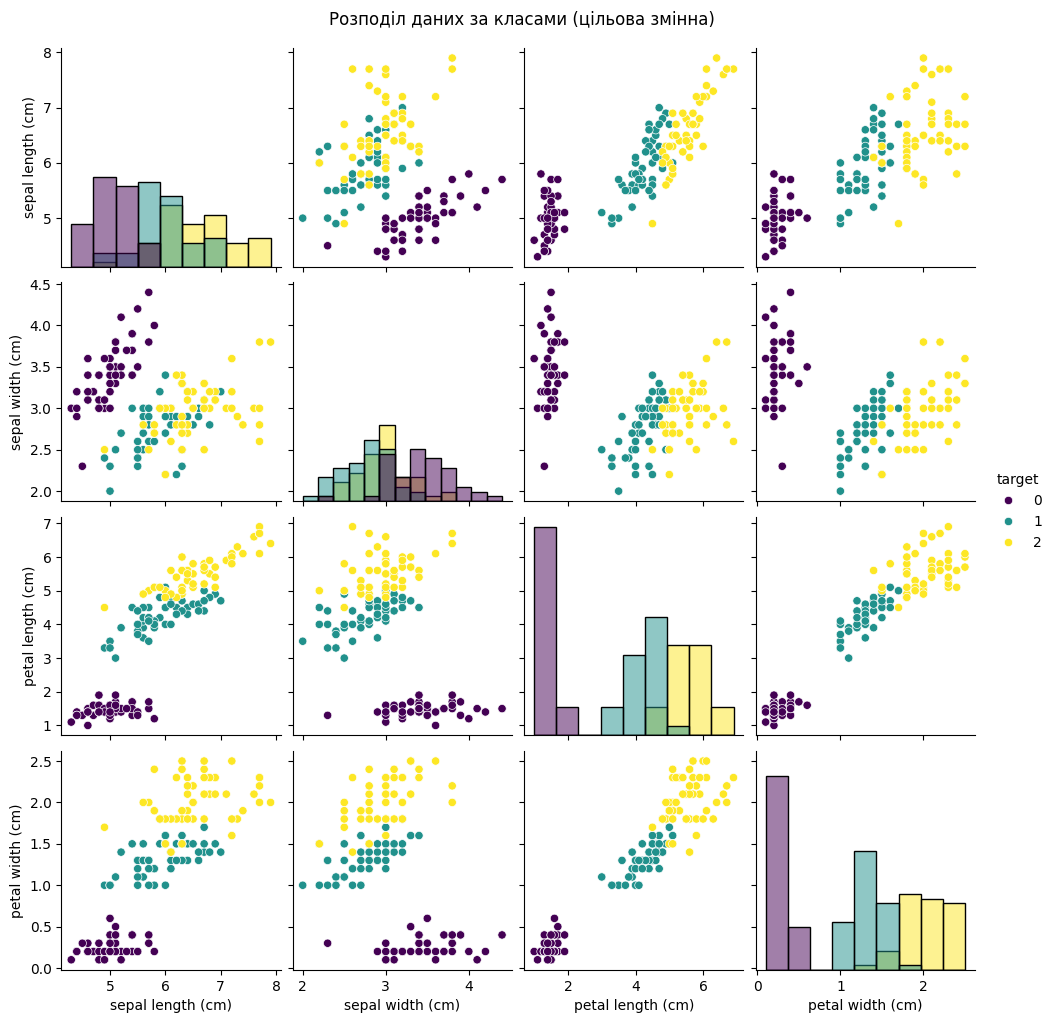


4. Стандартизація даних:
Дані стандартизовані.

5. Виконання спектральної кластеризації:
Кластеризація завершена.

6. Порівняння кластерів з дійсними класами:
Матриця плутанини (Confusion Matrix):
[[ 0 49  1]
 [ 3  0 47]
 [32  0 18]]


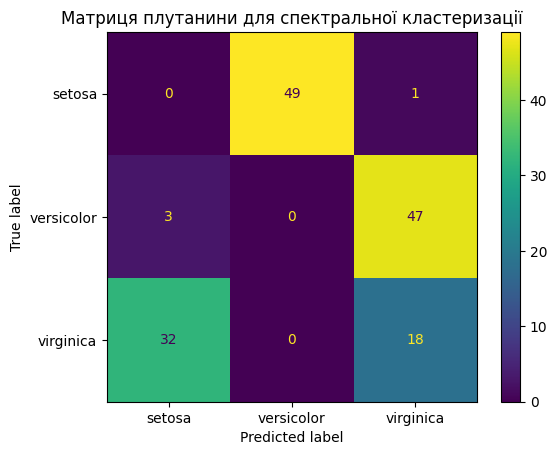


7. Візуалізація результатів кластеризації:


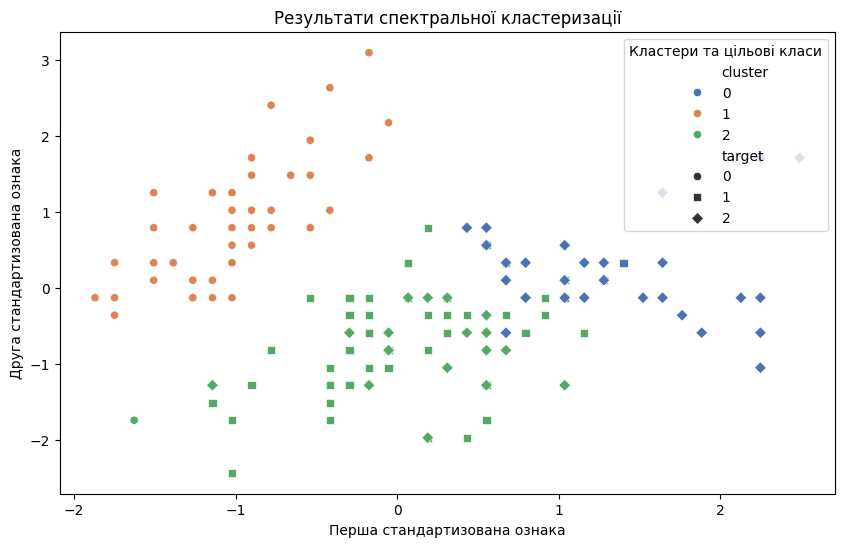


8. Висновок:

Спектральна кластеризація добре справилася з кластеризацією даних Iris. 
З матриці плутанини видно, що алгоритм успішно розподілив спостереження за класами,
хоча є певні помилки. Це зумовлено тим, що кластеризація не використовує цільову змінну.
Результати візуалізації підтверджують чіткий поділ між кластерами.



In [4]:
# Завантажуємо необхідні бібліотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from colorama import Fore, Style, init

# Ініціалізація colorama
init(autoreset=True)

# 1. Завантаження даних та створення DataFrame
print(f"{Fore.GREEN}{Style.BRIGHT}1. Завантаження даних та створення DataFrame")
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

# 2. Отримання базових статистичних характеристик
print(f"\n{Fore.CYAN}{Style.BRIGHT}2. Базові статистичні характеристики:")
print(data.describe())

# 3. Візуалізація розподілу спостережень за класами
print(f"\n{Fore.YELLOW}{Style.BRIGHT}3. Візуалізація розподілу спостережень за класами:")
sns.pairplot(data, hue="target", diag_kind="hist", palette="viridis")
plt.suptitle("Розподіл даних за класами (цільова змінна)", y=1.02)
plt.show()

# 4. Стандартизація даних
print(f"\n{Fore.GREEN}{Style.BRIGHT}4. Стандартизація даних:")
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, :-1])
print(f"{Fore.GREEN}Дані стандартизовані.")

# 5. Спектральна кластеризація
print(f"\n{Fore.BLUE}{Style.BRIGHT}5. Виконання спектральної кластеризації:")
spectral = SpectralClustering(
    n_clusters=3,  # У нас є 3 класи в Iris
    affinity='nearest_neighbors',
    random_state=42
)
clusters = spectral.fit_predict(data_scaled)
print(f"{Fore.BLUE}Кластеризація завершена.")

# Додаємо результати кластеризації в DataFrame
data['cluster'] = clusters

# 6. Порівняння кластерів з дійсними класами
print(f"\n{Fore.MAGENTA}{Style.BRIGHT}6. Порівняння кластерів з дійсними класами:")
conf_matrix = confusion_matrix(data['target'], data['cluster'])
print(f"{Fore.MAGENTA}Матриця плутанини (Confusion Matrix):")
print(conf_matrix)

# Візуалізація матриці плутанини
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)
disp.plot(cmap="viridis")
plt.title("Матриця плутанини для спектральної кластеризації")
plt.show()

# 7. Візуалізація результатів кластеризації
print(f"\n{Fore.YELLOW}{Style.BRIGHT}7. Візуалізація результатів кластеризації:")
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data_scaled[:, 0],
    y=data_scaled[:, 1],
    hue=data['cluster'],
    palette="deep",
    style=data['target'],
    markers=['o', 's', 'D']
)
plt.title("Результати спектральної кластеризації")
plt.xlabel("Перша стандартизована ознака")
plt.ylabel("Друга стандартизована ознака")
plt.legend(title="Кластери та цільові класи")
plt.show()

# 8. Висновок
print(f"\n{Fore.RED}{Style.BRIGHT}8. Висновок:")
print(f"""
{Fore.RED}{Style.BRIGHT}Спектральна кластеризація добре справилася з кластеризацією даних Iris.
З матриці плутанини видно, що алгоритм успішно розподілив спостереження за класами,
хоча є певні помилки. Це зумовлено тим, що кластеризація не використовує цільову змінну.
Результати візуалізації підтверджують чіткий поділ між кластерами.
""")
